# Portfolio Generate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
with open('raw_data_20181008.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)

In [3]:
raw_data.keys()

dict_keys(['AK홀딩스', 'BGF', 'BGF리테일', 'BNK금융지주', 'CJ', 'CJ CGV', 'CJ대한통운', 'CJ제일제당', 'DB손해보험', 'DB하이텍', 'GKL', 'GS', 'GS건설', 'GS리테일', 'HDC', 'HDC현대산업개발', 'JW중외제약', 'JW홀딩스', 'KB금융', 'KCC', 'KT', 'KT&G', 'LF', 'LG', 'LG디스플레이', 'LG상사', 'LG생활건강', 'LG유플러스', 'LG이노텍', 'LG전자', 'LG하우시스', 'LG화학', 'LIG넥스원', 'LS', 'LS산전', 'NAVER', 'NH투자증권', 'OCI', 'POSCO', 'S&T모티브', 'S-Oil', 'SBS', 'SK', 'SKC', 'SK네트웍스', 'SK디스커버리', 'SK이노베이션', 'SK케미칼', 'SK텔레콤', 'SK하이닉스', 'SPC삼립', '강원랜드', '고려아연', '고려제강', '금호석유', '금호타이어', '기아차', '기업은행', '남양유업', '남해화학', '넥센타이어', '넷마블', '녹십자', '녹십자홀딩스', '농심', '대교', '대덕전자', '대림산업', '대상', '대우건설', '대우조선해양', '대웅제약', '대한유화', '대한항공', '동국제강', '동서', '동아쏘시오홀딩스', '동아에스티', '동양', '동원F&B', '동원시스템즈', '두산', '두산밥캣', '두산인프라코어', '두산중공업', '락앤락', '롯데쇼핑', '롯데정밀화학', '롯데지주', '롯데칠성', '롯데케미칼', '롯데푸드', '롯데하이마트', '만도', '메리츠종금증권', '무학', '미래에셋대우', '보령제약', '부광약품', '빙그레', '삼성SDI', '삼성물산', '삼성바이오로직스', '삼성생명', '삼성에스디에스', '삼성엔지니어링', '삼성전기', '삼성전자', '삼성중공업', '삼성증권', '삼성카드', '삼성화재', '삼양사', '삼양홀딩스', '세방전지', '세아베스틸', '세아제강'

In [4]:
copy_keys = list(raw_data.keys())
for stock in copy_keys:
    if len(raw_data[stock].loc[:'2013-01-01']) < 1:
        del raw_data[stock]
        print(stock)

BGF
BGF리테일
HDC현대산업개발
LIG넥스원
SK케미칼
넷마블
동아에스티
두산밥캣
만도
삼성물산
삼성바이오로직스
삼성에스디에스
오리온
이노션
종근당
코스맥스
쿠쿠홀딩스
현대로템
현대중공업지주
효성중공업


In [5]:
len(raw_data)

182

In [6]:
raw_data['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,16060.0,16180.0,16000.0,16180.0,5.953252,11950800
2010-01-05,16520.0,16580.0,16300.0,16440.0,6.048919,27925850
2010-01-06,16580.0,16820.0,16520.0,16820.0,6.188735,22948850
2010-01-07,16820.0,16820.0,16260.0,16260.0,5.982689,22107950
2010-01-08,16400.0,16420.0,16120.0,16420.0,6.041558,14777550


In [7]:
# stock에서 Volume==0인 index, stock에서 제외
for key, df in raw_data.items():
    raw_data[key] = df.drop(df.index[np.where(df.Volume==0)[0]], axis=0)

In [8]:
# feature 생성
for key, df in raw_data.items():
    df["pct_change"] = df.Close.pct_change()
    for i in range(3, 31, 2):
        df["close_ma_{}".format(i)] = df.Close.rolling(window = i).mean()
        df["volume_ma_{}".format(i)] = df.Volume.rolling(window = i).mean()
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        df["his_vol_{}".format(i)] = df["pct_change"].rolling(window = i).std()*(252**0.5)
    for i in [1, 3, 5, 7, 10, 12, 14]:
        df['returnsCC{}'.format(i) ]= np.log(df.Open / df.Close.shift(i))
        df['returnsOO{}'.format(i) ] = np.log(df.Open / df.Open.shift(i))
        df['returnsCC{}'.format(i) ]= np.log(df.Close / df.Close.shift(i))
        df['returnsOC{}'.format(i) ] = np.log(df.Close / df.Open.shift(i))
    for i in [1, 3, 5, 7, 10]:
        df['Y3_{}'.format(i)] = np.where(df.Close.rolling(i).mean() - df.Close.shift(1).rolling(i).mean()>=0,1,0)
        for shift in [1, 2, 3, 4, 5]:
            df['sh{}_Y3_{}'.format(shift, i)] = df['Y3_{}'.format(i)].shift(-1*shift)

In [9]:
data={}
validation_={}
for stock, df in raw_data.items():
    data[stock] = df.loc['2013-07-01':'2018-07-01']
    validation_[stock] = df.loc['2018-06-20':]

In [10]:
data['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,26680.0,26920.0,26440.0,26520.0,36.487026,12825950,-0.011923,26713.333333,1.984778e+07,26260.0,...,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2013-07-02,26800.0,27040.0,26600.0,26700.0,36.734673,10214450,0.006787,26686.666667,1.466722e+07,26412.0,...,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2013-07-03,26680.0,26780.0,25900.0,26020.0,35.799110,12822050,-0.025468,26413.333333,1.195415e+07,26572.0,...,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2013-07-04,26040.0,26340.0,25920.0,26340.0,36.239376,9042650,0.012298,26353.333333,1.069305e+07,26484.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2013-07-05,25720.0,26300.0,25200.0,25340.0,34.863544,30382800,-0.037965,25900.000000,1.741583e+07,26184.0,...,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0


In [11]:
data['삼성전자'].tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-25,47050.0,47050.0,46150.0,46650.0,46305.597656,10587711,-0.012698,46983.333333,1.030042e+07,46990.0,...,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-26,45900.0,47300.0,45900.0,47000.0,46653.011719,11223166,0.007503,46966.666667,1.070296e+07,46990.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-27,47450.0,48500.0,47000.0,47950.0,47596.000000,15274752,0.020213,47200.000000,1.236188e+07,47180.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-28,46850.0,47150.0,46600.0,46800.0,46800.000000,12784800,-0.023983,47250.000000,1.309424e+07,47130.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-29,46250.0,47150.0,46200.0,46650.0,46650.000000,14099635,-0.003205,47133.333333,1.405306e+07,47010.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [12]:
validation_['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,47450.0,47600.0,46850.0,47000.0,46653.011719,12959316,0.000000,46866.666667,1.494639e+07,47290.0,...,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-21,47900.0,47900.0,47050.0,47050.0,46702.644531,10015541,0.001064,47016.666667,1.273094e+07,47060.0,...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-22,47000.0,47250.0,46200.0,47250.0,46901.167969,10298006,0.004251,47100.000000,1.109095e+07,46980.0,...,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-25,47050.0,47050.0,46150.0,46650.0,46305.597656,10587711,-0.012698,46983.333333,1.030042e+07,46990.0,...,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2018-06-26,45900.0,47300.0,45900.0,47000.0,46653.011719,11223166,0.007503,46966.666667,1.070296e+07,46990.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [15]:
%run moon_code

In [16]:
train, test = multi_train_test_split(data, 0.8, dtrain=True)

In [17]:
train['삼성전자'].tail()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-13,45140.0,45620.0,45140.0,45400.0,11721.989258,8624900,0.000441,45626.666667,1.043735e+07,45468.0,...,0.0,1.0,1.0,1.0,0,1.0,1.0,1.0,1.0,1.0
2017-06-14,45800.0,46060.0,45240.0,45360.0,11711.661133,10166700,-0.000881,45380.000000,9.915300e+06,45480.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-15,45680.0,45920.0,45180.0,45680.0,11794.284180,9657000,0.007055,45480.000000,9.482867e+06,45584.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-16,45500.0,45940.0,45460.0,45580.0,11768.463867,17403450,-0.002189,45540.000000,1.240905e+07,45480.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-19,45580.0,46560.0,45560.0,46560.0,12021.494141,11303900,0.021501,45940.000000,1.278812e+07,45716.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0


In [18]:
test['삼성전자'].head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,sh2_Y3_7,sh3_Y3_7,sh4_Y3_7,sh5_Y3_7,Y3_10,sh1_Y3_10,sh2_Y3_10,sh3_Y3_10,sh4_Y3_10,sh5_Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,47240.0,48140.0,47220.0,48140.0,12429.440430,15045000,0.033935,46760.000000,1.458412e+07,46264.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-21,47740.0,48120.0,47480.0,47480.0,12259.031250,9973650,-0.013710,47393.333333,1.210752e+07,46688.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-22,47960.0,48080.0,47720.0,47960.0,12382.965820,11455800,0.010110,47860.000000,1.215815e+07,47144.0,...,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-23,47600.0,47780.0,47420.0,47620.0,12295.179688,9515100,-0.007089,47686.666667,1.031485e+07,47552.0,...,1.0,1.0,0.0,1.0,1,1.0,1.0,1.0,1.0,1.0
2017-06-26,47520.0,48360.0,47520.0,48280.0,12465.586914,8552800,0.013860,47953.333333,9.841233e+06,47896.0,...,1.0,0.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0


# Learning

In [19]:
alg = XGBClassifier(
 learning_rate =0.15,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [20]:
y_li = [i for i in data['삼성전자'].columns if i.find('sh') != -1]

In [21]:
print(y_li)

['sh1_Y3_1', 'sh2_Y3_1', 'sh3_Y3_1', 'sh4_Y3_1', 'sh5_Y3_1', 'sh1_Y3_3', 'sh2_Y3_3', 'sh3_Y3_3', 'sh4_Y3_3', 'sh5_Y3_3', 'sh1_Y3_5', 'sh2_Y3_5', 'sh3_Y3_5', 'sh4_Y3_5', 'sh5_Y3_5', 'sh1_Y3_7', 'sh2_Y3_7', 'sh3_Y3_7', 'sh4_Y3_7', 'sh5_Y3_7', 'sh1_Y3_10', 'sh2_Y3_10', 'sh3_Y3_10', 'sh4_Y3_10', 'sh5_Y3_10']


In [23]:
%run xgb_modelfit

In [24]:
import copy

def modelfit(alg, train, test, X, y):
    alg = copy.deepcopy(alg)
    xgb_params = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[X].values, label=train[y].values)
    cvresult=xgb.cv(xgb_params, xgtrain,
                    num_boost_round=alg.get_params()['n_estimators'],
                    nfold=5, early_stopping_rounds=50,
                    show_stdv=False)
    alg.set_params(n_estimators=cvresult.shape[0])
    alg.fit(train[X], train[y], eval_metric='auc')
    dtrain_predictions = alg.predict(train[X])
    dtrain_predprob = alg.predict_proba(train[X])[:,1]
    dtest_predictions = alg.predict(test[X])
    dtest_predprob = alg.predict_proba(test[X])[:,1]
    print("Train Accuracy : {:.4f}".format(metrics.accuracy_score(
                            train[y].values, dtrain_predictions)))
    print("Train AUC Score : {:.4f}".format(metrics.roc_auc_score(
                            train[y].values, dtrain_predprob)))
    print("Test  Accuracy : {:.4f}".format(metrics.accuracy_score(
                            test[y].values, dtest_predictions)))
    print("Test  AUC Score : {:.4f}".format(metrics.roc_auc_score(
                            test[y].values, dtest_predprob)))
    return alg

In [28]:
model_set = {}
for stock, df in train.items():
    print('\n',stock)
    model = modelfit(alg, df, test[stock], X, 'sh1_Y3_5')
    model_set[stock] = model


 AK홀딩스
Train Accuracy : 0.9224
Train AUC Score : 0.9821
Test  Accuracy : 0.8571
Test  AUC Score : 0.9298

 BNK금융지주
Train Accuracy : 0.9040
Train AUC Score : 0.9750
Test  Accuracy : 0.8531
Test  AUC Score : 0.9247

 CJ
Train Accuracy : 0.9193
Train AUC Score : 0.9766
Test  Accuracy : 0.8286
Test  AUC Score : 0.9164

 CJ CGV
Train Accuracy : 0.9316
Train AUC Score : 0.9856
Test  Accuracy : 0.8571
Test  AUC Score : 0.9192

 CJ대한통운
Train Accuracy : 0.9459
Train AUC Score : 0.9912
Test  Accuracy : 0.8612
Test  AUC Score : 0.9278

 CJ제일제당
Train Accuracy : 0.9694
Train AUC Score : 0.9982
Test  Accuracy : 0.8367
Test  AUC Score : 0.9165

 DB손해보험
Train Accuracy : 0.9571
Train AUC Score : 0.9927
Test  Accuracy : 0.8163
Test  AUC Score : 0.9028

 DB하이텍
Train Accuracy : 0.9234
Train AUC Score : 0.9766
Test  Accuracy : 0.8408
Test  AUC Score : 0.9241

 GKL
Train Accuracy : 0.9336
Train AUC Score : 0.9822
Test  Accuracy : 0.8612
Test  AUC Score : 0.9410

 GS
Train Accuracy : 0.9734
Train AUC Score 

Train Accuracy : 0.9317
Train AUC Score : 0.9809
Test  Accuracy : 0.8058
Test  AUC Score : 0.9044

 롯데정밀화학
Train Accuracy : 0.9265
Train AUC Score : 0.9847
Test  Accuracy : 0.7796
Test  AUC Score : 0.8575

 롯데지주
Train Accuracy : 0.9205
Train AUC Score : 0.9787
Test  Accuracy : 0.8292
Test  AUC Score : 0.8976

 롯데칠성
Train Accuracy : 1.0000
Train AUC Score : 1.0000
Test  Accuracy : 0.7810
Test  AUC Score : 0.8602

 롯데케미칼
Train Accuracy : 0.9857
Train AUC Score : 0.9989
Test  Accuracy : 0.7837
Test  AUC Score : 0.8541

 롯데푸드
Train Accuracy : 0.9275
Train AUC Score : 0.9805
Test  Accuracy : 0.8182
Test  AUC Score : 0.9028

 롯데하이마트
Train Accuracy : 0.9734
Train AUC Score : 0.9978
Test  Accuracy : 0.8122
Test  AUC Score : 0.9078

 메리츠종금증권
Train Accuracy : 0.9990
Train AUC Score : 1.0000
Test  Accuracy : 0.8286
Test  AUC Score : 0.9055

 무학
Train Accuracy : 0.9387
Train AUC Score : 0.9874
Test  Accuracy : 0.7673
Test  AUC Score : 0.8755

 미래에셋대우
Train Accuracy : 0.8999
Train AUC Score : 0.964

Train Accuracy : 0.9161
Train AUC Score : 0.9765
Test  Accuracy : 0.8286
Test  AUC Score : 0.9015

 한전KPS
Train Accuracy : 0.9745
Train AUC Score : 0.9971
Test  Accuracy : 0.8204
Test  AUC Score : 0.8894

 한전기술
Train Accuracy : 0.8999
Train AUC Score : 0.9688
Test  Accuracy : 0.8327
Test  AUC Score : 0.9044

 한진중공업
Train Accuracy : 0.9581
Train AUC Score : 0.9925
Test  Accuracy : 0.8122
Test  AUC Score : 0.9006

 한화
Train Accuracy : 0.9775
Train AUC Score : 0.9977
Test  Accuracy : 0.8490
Test  AUC Score : 0.9210

 한화생명
Train Accuracy : 0.8866
Train AUC Score : 0.9583
Test  Accuracy : 0.8408
Test  AUC Score : 0.9104

 한화에어로스페이스
Train Accuracy : 0.9101
Train AUC Score : 0.9532
Test  Accuracy : 0.8327
Test  AUC Score : 0.8734

 한화케미칼
Train Accuracy : 0.9826
Train AUC Score : 0.9988
Test  Accuracy : 0.7510
Test  AUC Score : 0.8432

 현대건설
Train Accuracy : 0.9275
Train AUC Score : 0.9746
Test  Accuracy : 0.8367
Test  AUC Score : 0.9039

 현대그린푸드
Train Accuracy : 0.9694
Train AUC Score : 0.997

In [29]:
for stock, model in model_set.items():
    print(stock, ' ', model.get_params()['n_estimators'])

AK홀딩스   12
BNK금융지주   17
CJ   12
CJ CGV   20
CJ대한통운   26
CJ제일제당   43
DB손해보험   32
DB하이텍   12
GKL   22
GS   41
GS건설   4
GS리테일   15
HDC   22
JW중외제약   2
JW홀딩스   26
KB금융   11
KCC   13
KT   21
KT&G   6
LF   4
LG   47
LG디스플레이   171
LG상사   26
LG생활건강   12
LG유플러스   6
LG이노텍   3
LG전자   4
LG하우시스   22
LG화학   6
LS   12
LS산전   2
NAVER   5
NH투자증권   32
OCI   7
POSCO   15
S&T모티브   12
S-Oil   37
SBS   72
SK   49
SKC   12
SK네트웍스   12
SK디스커버리   25
SK이노베이션   10
SK텔레콤   25
SK하이닉스   16
SPC삼립   16
강원랜드   29
고려아연   14
고려제강   20
금호석유   11
금호타이어   6
기아차   9
기업은행   43
남양유업   19
남해화학   8
넥센타이어   22
녹십자   10
녹십자홀딩스   14
농심   10
대교   39
대덕전자   11
대림산업   3
대상   7
대우건설   15
대우조선해양   10
대웅제약   6
대한유화   20
대한항공   5
동국제강   20
동서   25
동아쏘시오홀딩스   15
동양   52
동원F&B   6
동원시스템즈   74
두산   18
두산인프라코어   13
두산중공업   14
락앤락   6
롯데쇼핑   16
롯데정밀화학   24
롯데지주   12
롯데칠성   88
롯데케미칼   47
롯데푸드   13
롯데하이마트   41
메리츠종금증권   66
무학   21
미래에셋대우   4
보령제약   5
부광약품   178
빙그레   38
삼성SDI   18
삼성생명   12
삼성엔지니어링   12
삼성전기   9
삼성전자   43
삼성중공업   48
삼성증권   30
삼

In [212]:
validation_[stock][X]

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_5,...,returnsOO12,returnsOC12,returnsCC14,returnsOO14,returnsOC14,Y3_1,Y3_3,Y3_5,Y3_7,Y3_10
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,30450.0,30450.0,28500.0,28500.0,28500.0,195667,-0.067103,29650.000000,242168.333333,29700.0,...,0.009901,-0.056281,-0.064539,-0.019513,-0.085695,0,0,0,0,0
2018-06-21,28600.0,28800.0,28300.0,28450.0,28450.0,78562,-0.001754,29166.666667,205759.666667,29310.0,...,-0.056089,-0.061348,-0.056377,-0.059390,-0.064648,0,0,0,0,0
2018-06-22,28100.0,28500.0,27850.0,28400.0,28400.0,71601,-0.001757,28450.000000,115276.666667,29160.0,...,-0.043523,-0.032903,-0.063107,-0.070415,-0.059796,0,0,0,0,0
2018-06-25,28050.0,28800.0,27850.0,28800.0,28800.0,59640,0.014085,28550.000000,69934.333333,28940.0,...,-0.026387,0.000000,-0.010363,-0.075508,-0.049121,1,1,0,0,1
2018-06-26,28800.0,29400.0,28650.0,29350.0,29350.0,73446,0.019097,28850.000000,68229.000000,28700.0,...,0.006969,0.025886,0.015451,-0.018917,0.000000,1,1,0,1,1
2018-06-27,29050.0,29850.0,28900.0,29600.0,29600.0,116276,0.008518,29250.000000,83120.666667,28920.0,...,0.001723,0.020479,0.029137,0.008643,0.027399,1,1,1,0,0
2018-06-28,29950.0,30350.0,29550.0,29750.0,29750.0,100100,0.005068,29566.666667,96607.333333,29180.0,...,0.033959,0.027259,0.025533,0.046123,0.039422,1,1,1,0,0
2018-06-29,29900.0,30000.0,28800.0,29250.0,29250.0,96992,-0.016807,29533.333333,104456.000000,29350.0,...,0.015165,-0.006814,0.020726,0.030563,0.008584,0,0,1,1,1
2018-07-02,29200.0,30150.0,28800.0,29500.0,29500.0,97549,0.008547,29500.000000,98213.666667,29490.0,...,-0.011915,-0.001693,0.006803,0.008599,0.018820,1,0,1,1,0


In [30]:
pred = pd.DataFrame()
for stock, model in model_set.items():
    a = model.predict(validation_[stock][X])
    a = pd.DataFrame(a, index = validation_[stock].index, columns=['{}'.format(stock)])
    pred = pd.concat((pred, a), axis=1)
    pred = pred.fillna(0)
col = pd.MultiIndex.from_product([['pred'],pred.columns])
pred.columns = col

In [32]:
pred.head()

pred                                                           \
           AK홀딩스 BNK금융지주   CJ CJ CGV CJ대한통운 CJ제일제당 DB손해보험 DB하이텍  GKL   GS   
Date                                                                        
2018-06-20   0.0     0.0  0.0    0.0    0.0    0.0    1.0   1.0  0.0  0.0   
2018-06-21   0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-06-22   0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-06-25   0.0     0.0  1.0    1.0    1.0    1.0    0.0   1.0  0.0  0.0   
2018-06-26   0.0     0.0  0.0    1.0    1.0    1.0    0.0   1.0  0.0  1.0   

           ...                                                       
           ...  현대위아 현대제철 현대중공업  현대차 현대해상 현대홈쇼핑 호텔신라   효성   후성  휴켐스  
Date       ...                                                       
2018-06-20 ...   0.0  0.0   0.0  0.0  1.0   1.0  0.0  0.0  0.0  0.0  
2018-06-21 ...   0.0  0.0   0.0  0.0  1.0   1.0  0.0  0.0  1.0  0.0  
2018-06-22 ...   0.0  0.0   0.0  0.0  1.0   1.0  1.0  0.0  1.0  0.0  
2018-06-25 ...   0.0  1.0   1.0  0.0  0.0   0.0  1.0  0.0  1.0  0.0  
2018-06-26 ...   0.0  0.0   1.0  1.0  0.0   1.0  0.0  0.0  1.0  1.0  

[5 rows x 182 columns]

In [33]:
y_true = pd.DataFrame()
for stock in model_set.keys():
    y_true = pd.concat((y_true, validation_[stock]['sh1_Y3_5']), axis=1)
y_true.columns = list(model_set.keys())
y_true = y_true.fillna(0)
col = pd.MultiIndex.from_product([['y_true'],y_true.columns])
y_true.columns = col

In [34]:
y_true.head()

y_true                                                           \
            AK홀딩스 BNK금융지주   CJ CJ CGV CJ대한통운 CJ제일제당 DB손해보험 DB하이텍  GKL   GS   
Date                                                                         
2018-06-20    0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-06-21    0.0     0.0  0.0    0.0    1.0    0.0    1.0   1.0  0.0  0.0   
2018-06-22    0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-06-25    0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  1.0   
2018-06-26    0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   

           ...                                                       
           ...  현대위아 현대제철 현대중공업  현대차 현대해상 현대홈쇼핑 호텔신라   효성   후성  휴켐스  
Date       ...                                                       
2018-06-20 ...   0.0  0.0   0.0  0.0  0.0   1.0  0.0  0.0  1.0  0.0  
2018-06-21 ...   0.0  0.0   0.0  0.0  1.0   1.0  0.0  0.0  1.0  0.0  
2018-06-22 ...   0.0  1.0   1.0  0.0  0.0   0.0  1.0  0.0  1.0  0.0  
2018-06-25 ...   0.0  1.0   1.0  0.0  0.0   0.0  0.0  0.0  1.0  0.0  
2018-06-26 ...   0.0  0.0   0.0  0.0  0.0   1.0  0.0  0.0  1.0  1.0  

[5 rows x 182 columns]

In [40]:
(y_true.values == pred.values).sum() / pred.size

0.7997645211930926

In [41]:
def get_col_df(df_name, fillna=None):
    df = pd.DataFrame()
    for stock in model_set.keys():
        df = pd.concat((df,validation_[stock][df_name]), axis=1)
    df.columns = list(model_set.keys())
    if fillna == 'mean':
        df = df.fillna(df.mean())
    else:
        df = df.fillna(0)
    col = pd.MultiIndex.from_product([['{}'.format(df_name)],df.columns])
    df.columns = col
    return df

In [42]:
res = pd.concat((pred, y_true), axis=1)
res = pd.concat((res, get_col_df('Close', 'mean')), axis=1)
res = pd.concat((res, get_col_df('Open', 'mean')), axis=1)

In [44]:
res.head()

pred                                                           \
           AK홀딩스 BNK금융지주   CJ CJ CGV CJ대한통운 CJ제일제당 DB손해보험 DB하이텍  GKL   GS   
Date                                                                        
2018-06-20   0.0     0.0  0.0    0.0    0.0    0.0    1.0   1.0  0.0  0.0   
2018-06-21   0.0     0.0  0.0    0.0    1.0    0.0    1.0   0.0  0.0  0.0   
2018-06-22   0.0     0.0  0.0    1.0    1.0    0.0    0.0   1.0  0.0  0.0   
2018-06-25   0.0     0.0  1.0    1.0    1.0    1.0    0.0   1.0  0.0  0.0   
2018-06-26   0.0     0.0  0.0    1.0    1.0    1.0    0.0   1.0  0.0  1.0   

             ...        Open                                                  \
             ...        현대위아     현대제철     현대중공업       현대차     현대해상     현대홈쇼핑   
Date         ...                                                               
2018-06-20   ...     44500.0  54600.0  105500.0  130500.0  38000.0  113500.0   
2018-06-21   ...     44150.0  55000.0  107000.0  129500.0  36550.0  111000.0   
2018-06-22   ...     42450.0  54900.0  105500.0  126000.0  35100.0  112000.0   
2018-06-25   ...     43250.0  54800.0  110500.0  129500.0  36250.0  112000.0   
2018-06-26   ...     42300.0  56300.0  110500.0  128000.0  35300.0  112500.0   

                                                      
                호텔신라            효성       후성      휴켐스  
Date                                                  
2018-06-20  120500.0  45787.735849   9430.0  30450.0  
2018-06-21  124000.0  45787.735849   9750.0  28600.0  
2018-06-22  123000.0  45787.735849  10050.0  28100.0  
2018-06-25  122500.0  45787.735849  10100.0  28050.0  
2018-06-26  121500.0  45787.735849  10000.0  28800.0  

[5 rows x 728 columns]

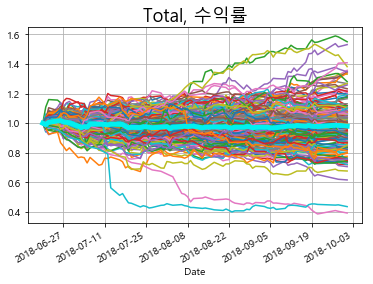

In [197]:
p = ((res.Close - res.Open)/res.Open)+1
p.iloc[0]=1
p = p.cumprod()
p.plot(grid=True, legend=False)
p.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('Total, 수익률', fontsize=18)
plt.show()

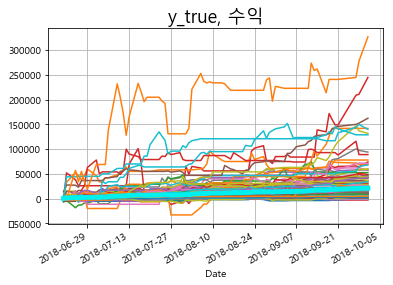

In [186]:
p1 = ((res.Close - res.Open) * res.y_true.shift(1)).cumsum()
p1.plot(grid=True, legend=False)
p1.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('y_true, 수익', fontsize=18)
plt.show()

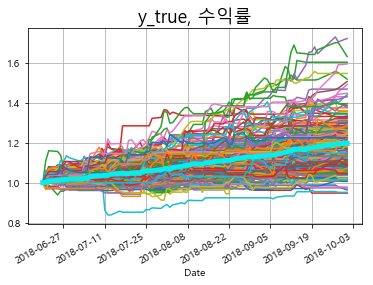

In [187]:
p2 = (((res.Close - res.Open) * res.y_true.shift(1) / res.Open) + 1).fillna(1).cumprod()
p2.plot(grid=True, legend=False)
p2.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('y_true, 수익률', fontsize=18)
plt.show()

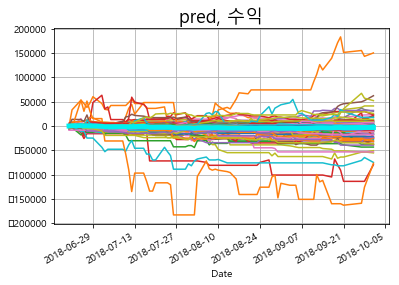

In [188]:
p3 = ((res.Close - res.Open) * res.pred.shift(1)).cumsum()
p3.plot(grid=True, legend=False)
p3.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('pred, 수익', fontsize=18)
plt.show()

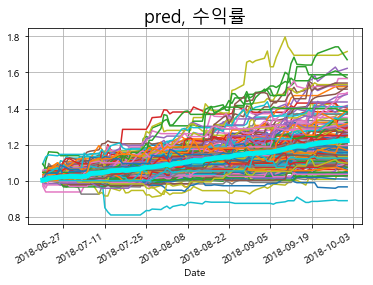

In [211]:
p41 = (((res.Close - res.Open) * res.pred / res.Open) + 1).fillna(1).cumprod()
p41.plot(grid=True, legend=False)
p41.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('pred, 수익률', fontsize=18)
plt.show()

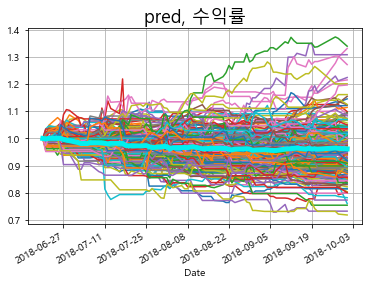

In [189]:
p4 = (((res.Close - res.Open) * res.pred.shift(1) / res.Open) + 1).fillna(1).cumprod()
p4.plot(grid=True, legend=False)
p4.mean(1).plot(grid=True, lw=5, color='#00F0F0')
plt.title('pred, 수익률', fontsize=18)
plt.show()

In [202]:
portfolio_t = pd.Series(index=res.pred.index)
portfolio_t.iloc[0] = 1e8
for i in range(len(portfolio_t)-1):
    money_stock_invest = portfolio_t.iloc[i] / len(res.pred.columns)
    stock_share = (money_stock_invest / res.Open.iloc[i+1]).replace(np.inf,0).astype(int)
    portfolio_t.iloc[i+1] = portfolio_t.iloc[i] + sum((res.Close.iloc[i+1] - res.Open.iloc[i+1]) * stock_share)

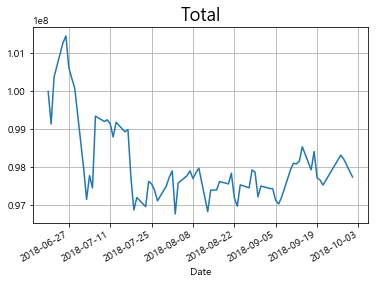

In [204]:
portfolio_t.plot(grid=True)
plt.title('Total', fontsize=18)
plt.show()

In [67]:
portfolio = pd.Series(index=res.pred.index)
portfolio.iloc[0] = 1e8
for i in range(len(portfolio)-1):
    money_stock_invest = portfolio.iloc[i] / res.y_true.sum(1).iloc[i]
    stock_share = (money_stock_invest / (res.y_true.iloc[i] * res.Open.iloc[i+1])).replace(np.inf,0).astype(int)
    portfolio.iloc[i+1] = portfolio.iloc[i] + sum((res.Close.iloc[i+1] - res.Open.iloc[i+1]) * stock_share)

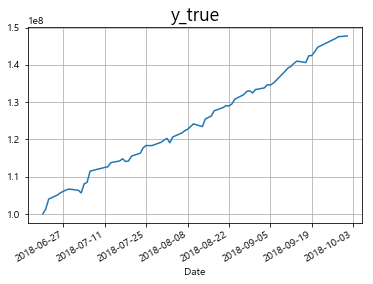

In [79]:
portfolio.plot(grid=True)
plt.title('y_true', fontsize=18)
plt.show()

In [73]:
portfolio2 = pd.Series(index=res.pred.index)
portfolio2.iloc[0] = 1e8
for i in range(len(portfolio2)-1):
    money_stock_invest = portfolio2.iloc[i] / res.pred.sum(1).iloc[i]
    stock_share = (money_stock_invest / (res.pred.iloc[i] * res.Open.iloc[i+1])).replace(np.inf,0).astype(int)
    portfolio2.iloc[i+1] = portfolio2.iloc[i] + sum((res.Close.iloc[i+1] - res.Open.iloc[i+1]) * stock_share)

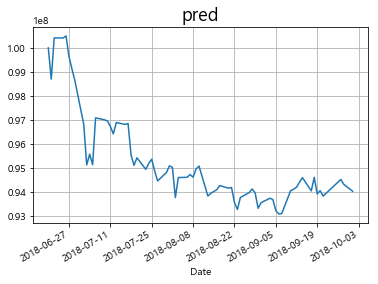

In [80]:
portfolio2.plot(grid=True)
plt.title('pred', fontsize=18)
plt.show()

# Portfolio 검증

In [100]:
portfolio = pd.Series(index=res.pred.index)
portfolio.iloc[0] = 1e8 # 초기 자본
portfolio.head()

Date
2018-06-20    100000000.0
2018-06-21            NaN
2018-06-22            NaN
2018-06-25            NaN
2018-06-26            NaN
dtype: float64

In [102]:
# 주식딩 투자 자본
money_stock_invest = portfolio.iloc[0] / res.y_true.sum(1).iloc[0]
money_stock_invest

4000000.0

In [121]:
# 1일차 주식 보유 (다음날 Open에 사서 당일 Close로 청산)
stock_share = (money_stock_invest / (res.y_true.iloc[0] * res.Open.iloc[1])).replace(np.inf,0).astype(int)

In [126]:
# 1일차 Daily 이득
portfolio.iloc[1] = portfolio.iloc[0] + sum((res.Close.iloc[1] - res.Open.iloc[1]) * stock_share)

In [127]:
portfolio.head()

Date
2018-06-20    100000000.0
2018-06-21    101312780.0
2018-06-22            NaN
2018-06-25            NaN
2018-06-26            NaN
dtype: float64